<a href="https://colab.research.google.com/github/0x416C657852/DiceClassificationCNN/blob/AlexTesting/DiceClassificationCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function
import keras
import tensorflow as tf
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, MaxPool2D
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import glob
import os
import cv2
from keras.optimizers import Adam
import pandas
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

#drag and drop the diceZip.zip file into the files section. this brings
#loadtimes from 75 minutes for the first epoch to 10 minutes
#and all further epochs fro15 8 minutes to 10

Mounted at /content/drive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!unzip -qq  "/content/drive/MyDrive/diceZip.zip" -d "/content/diceData"

In [5]:
train_path = 'diceData/dice/train'
test_path = 'diceData/dice/valid'

In [34]:
generator = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.05, width_shift_range=0.05, height_shift_range=0.05, shear_range=0.05, horizontal_flip=True, fill_mode="nearest",preprocessing_function=tf.keras.applications.vgg16.preprocess_input,validation_split=0.2)
train_batches = generator.flow_from_directory(directory=train_path, target_size=(480,480), classes=['d10', 'd12','d20','d4','d6','d8'], batch_size=64, subset='training',shuffle=True,seed=420)
valid_batches = generator.flow_from_directory(directory=train_path, target_size=(480,480), classes=['d10', 'd12','d20','d4','d6','d8'], batch_size=64, subset='validation', shuffle=True,seed=420)
test_batches = ImageDataGenerator(rescale=1./255,preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(480,480), classes=['d10', 'd12','d20','d4','d6','d8'], batch_size=64,shuffle=True,seed=420)

Found 11429 images belonging to 6 classes.
Found 2855 images belonging to 6 classes.
Found 2102 images belonging to 6 classes.


In [35]:
imgs, labels = next(train_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

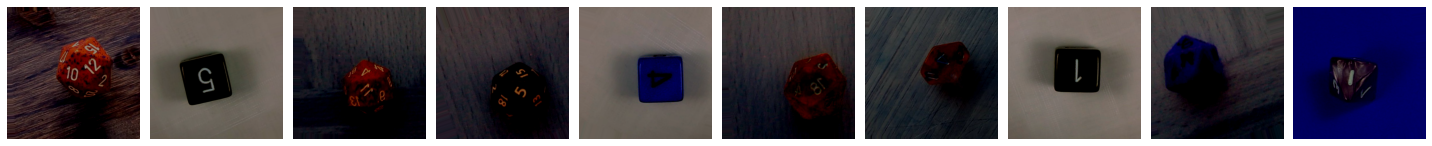

[[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0.

In [36]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(imgs)
print(labels)

In [37]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), kernel_initializer='he_normal', activation='relu', padding = 'same', input_shape=(480,480,3),kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Conv2D(filters=32, kernel_size=(3, 3), kernel_initializer='he_normal', activation='relu', padding = 'same',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), kernel_initializer='he_normal', activation='relu', padding = 'same',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Conv2D(filters=64, kernel_size=(3, 3), kernel_initializer='he_normal', activation='relu', padding = 'same',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), kernel_initializer='he_normal', activation='relu', padding = 'same',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Conv2D(filters=64, kernel_size=(3, 3), kernel_initializer='he_normal', activation='relu', padding = 'same',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=6, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 480, 480, 32)      896       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 480, 480, 32)      9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 240, 240, 32)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 240, 240, 64)      18496     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 240, 240, 64)      36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 120, 120, 64)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 120, 120, 64)     

In [38]:
model.compile(optimizer=Adam(learning_rate=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = model.fit(x=train_batches,
    batch_size=500,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=10,
     callbacks=[callback],
    verbose=1
)

Epoch 1/10
179/179 [==============================] - 761s 4s/step - loss: 1.9489 - accuracy: 0.4875 - val_loss: 5.4273 - val_accuracy: 0.3012
Epoch 2/10
179/179 [==============================] - 783s 4s/step - loss: 0.9934 - accuracy: 0.8577 - val_loss: 8.0021 - val_accuracy: 0.3419
Epoch 3/10
179/179 [==============================] - 775s 4s/step - loss: 0.7857 - accuracy: 0.9346 - val_loss: 9.3786 - val_accuracy: 0.3947
Epoch 4/10
179/179 [==============================] - 773s 4s/step - loss: 0.7136 - accuracy: 0.9584 - val_loss: 11.1511 - val_accuracy: 0.3058
Epoch 5/10
179/179 [==============================] - 766s 4s/step - loss: 0.6578 - accuracy: 0.9726 - val_loss: 14.5233 - val_accuracy: 0.3324
Epoch 6/10
179/179 [==============================] - 763s 4s/step - loss: 0.6648 - accuracy: 0.9651 - val_loss: 12.6314 - val_accuracy: 0.3506
Epoch 7/10
179/179 [==============================] - 753s 4s/step - loss: 0.6203 - accuracy: 0.9813 - val_loss: 13.5782 - val_accuracy: 0.

In [40]:
score = model.evaluate(test_batches, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

33/33 [==============================] - 19s 570ms/step - loss: 4.0545 - accuracy: 0.8482
Test loss: 4.054470062255859
Test accuracy: 0.8482397794723511


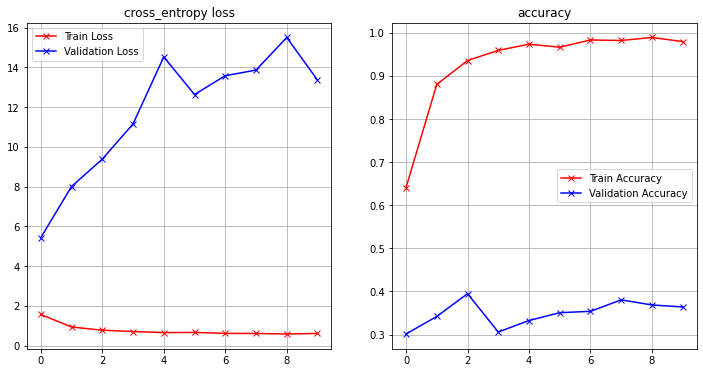

In [41]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)